In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [54]:
airlineData = pd.read_csv('data/flights.csv')
#https://www.kaggle.com/datasets/monareyhanii/flights/data

# Dataset Information

In [55]:
airlineData.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


```
id
A unique identifier assigned to each flight record in this dataset.

year	
The year in which the flight took place. The dataset includes flights from the year 2013

month	
The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December)

day	
The day of the month on which the flight took place, represented by an integer from 1 to 31

dep_time	
The actual departure time of the flight, represented in 24-hour format (hhmm)

sched_dep_time	
The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm)

dep_delay	
The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure.

arr_time	
The actual arrival time of the flight, represented in 24-hour format (hhmm)

sched_arr_time	
The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm)

arr_delay	
The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. Positive values indicate a delay, while negative values indicate an early arrival

carrier	
A two-letter code representing the airline carrier responsible for the flight

flight	
The designated number of the flight

tailnum	
A unique identifier associated with the aircraft used for the flight

origin	
A three-letter code signifying the airport from which the flight departed

dest	
A three-letter code representing the airport at which the flight arrived

air_time	
The duration of the flight, measured in minutes

distance	
The total distance (in miles) between the origin and destination airports

hour	
The hour component of the scheduled departure time, expressed in local time

minute	
The minute component of the scheduled departure time, expressed in local time

time_hour	
The scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss"

name	
The full name of the airline carrier responsible for the flight
```

In [56]:
airlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [57]:
airlineData.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


# Business Understanding

#### The dataset contains flight data in 2013. There are numerous features to include carriers, origins, distance, and times. We are trying to predict the delay for flights.

# Data Understanding and Preparation

In [58]:
airlineData.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [59]:
airlineData.dropna(axis=0, inplace=True)

In [60]:
airlineData.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [61]:
airlineData['id'].value_counts()
#The id column holds no relevant data
airlineData.drop(['id'],axis = 1,inplace = True)

In [62]:
airlineData['year'].value_counts()
#This dataset is for 2013 only. This value is the same for all rows.
airlineData.drop(['year'],axis = 1,inplace = True)

In [63]:
#I find that the sched_dep_time column contains both the hour and minute columns.
airlineData.drop(['hour'],axis = 1,inplace = True)
airlineData.drop(['minute'],axis = 1,inplace = True)

In [64]:
# The time_hour column contains the date (which I have in the month and day column) and the time (which I have in the sched_dep_time)
airlineData.drop(['time_hour'],axis = 1,inplace = True)

Text(0.5, 1.0, 'Flights by Month')

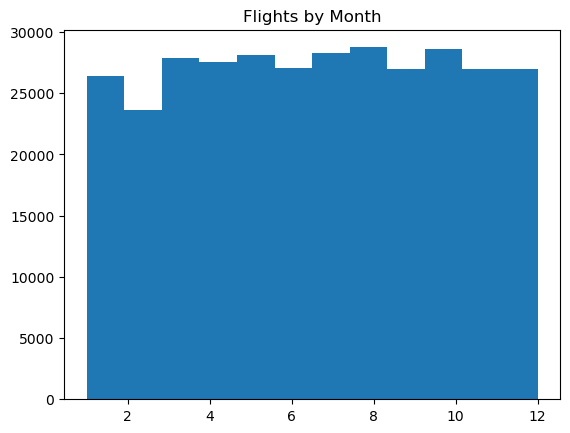

In [65]:
#The month column is relatively equal. This will likely not be a feature.
plt.hist(airlineData['month'], bins=12)
plt.title("Flights by Month")

Text(0.5, 1.0, 'Flights by Day')

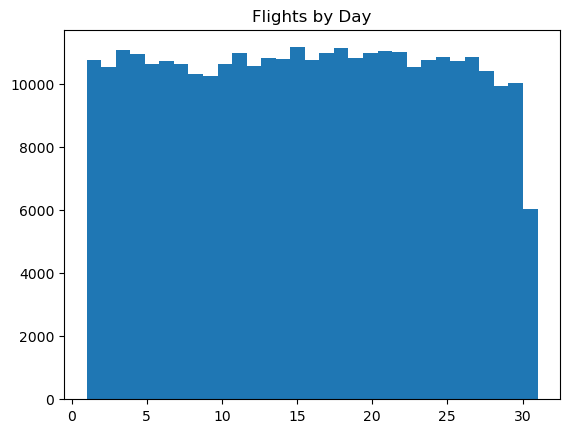

In [66]:
#The day column is relatively equal. This will likely not be a feature.
plt.hist(airlineData['day'], bins=31)
plt.title("Flights by Day")

In [67]:
airlineData['arr_delay'].dtypes

dtype('float64')

In [68]:
airlineData['carrier'].value_counts()
#The carrier and name column provides the same information
airlineData.drop(['name'],axis = 1,inplace = True)

In [69]:
# I may remove this later
airlineData['tailnum'].value_counts()

N725MQ    544
N722MQ    485
N723MQ    475
N711MQ    462
N713MQ    449
         ... 
N456UW      1
N26906      1
N809NW      1
N941UW      1
N557AS      1
Name: tailnum, Length: 4037, dtype: int64

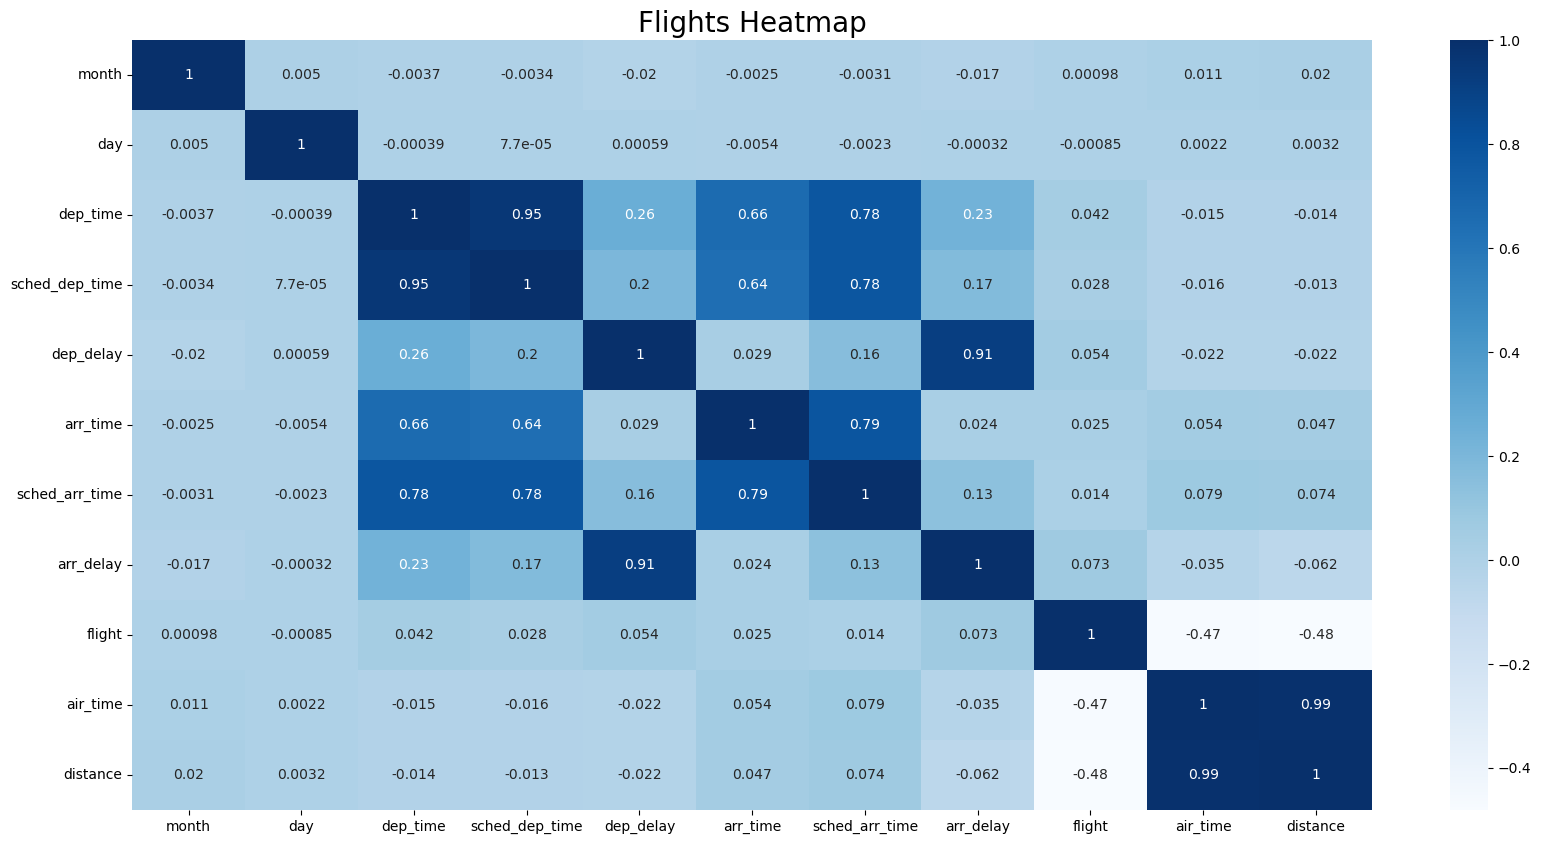

In [70]:
numbers = airlineData.select_dtypes(include=['number'])

plt.figure(figsize=(20, 10))
plt.title('Flights Heatmap', fontsize = 20) # title with fontsize 20
sns.heatmap(numbers.corr(), annot=True, cmap='Blues');

Text(0.5, 1.0, 'Arrival and Departure Delays')

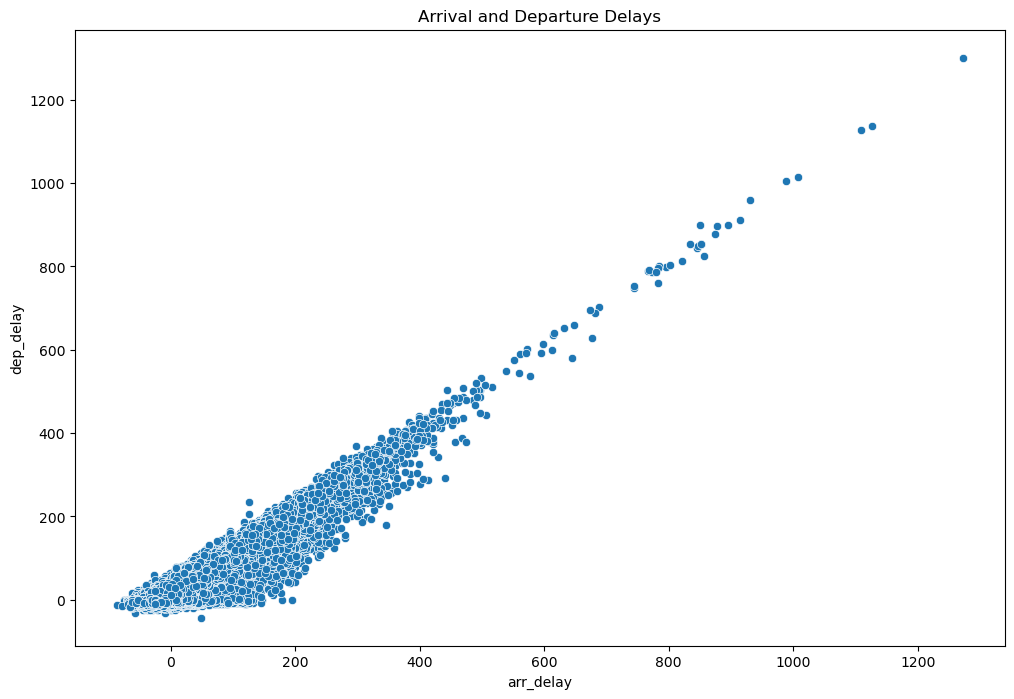

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(airlineData , x='arr_delay' , y='dep_delay');
plt.title("Arrival and Departure Delays")

In [72]:
airlineData.select_dtypes(include='object')

,carrier,tailnum,origin,dest
0,UA,N14228,EWR,IAH
1,UA,N24211,LGA,IAH
2,AA,N619AA,JFK,MIA
3,B6,N804JB,JFK,BQN
4,DL,N668DN,LGA,ATL
...,...,...,...,...
336765,B6,N354JB,JFK,SYR
336766,B6,N281JB,JFK,BUF
336767,B6,N346JB,JFK,ROC
336768,B6,N565JB,JFK,BOS


##### Encoding strings as numbers

In [73]:
airlineData['carrier_logReg'] = pd.factorize(airlineData['carrier'])[0]

In [74]:
airlineData['origin_logReg'] = pd.factorize(airlineData['origin'])[0]

In [75]:
airlineData['dest_logReg'] = pd.factorize(airlineData['dest'])[0]

In [76]:
airlineData.drop(['carrier'],axis = 1,inplace = True)
airlineData.drop(['origin'],axis = 1,inplace = True)
airlineData.drop(['dest'],axis = 1,inplace = True)

In [77]:
airlineData.drop(columns='tailnum', inplace=True)

In [78]:
airlineData['arr_delay'].dtypes

dtype('float64')

In [79]:
airlineData.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'flight', 'air_time', 'distance',
       'carrier_logReg', 'origin_logReg', 'dest_logReg'],
      dtype='object')

# Feature Selection

In [92]:
X = airlineData.drop(['arr_delay'],axis = 1)

# Target Column
y = airlineData['arr_delay'].astype(int)

In [93]:
ig = mutual_info_regression(X, y)
feature_scores = {}
for i in range(len(airlineData.columns)-1):
    feature_scores[airlineData.columns[i]] = ig[i]
    
# Sorting the features based on score
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print(feature, ': :', score)

dep_delay : : 0.5243416215131527
arr_time : : 0.27020688668742476
dep_time : : 0.08565861510724204
arr_delay : : 0.05244934819049085
sched_arr_time : : 0.04470637297637392
flight : : 0.04274781807264727
sched_dep_time : : 0.04219380763163727
air_time : : 0.036609752784579896
origin_logReg : : 0.029659088075617568
distance : : 0.024756650395715063
month : : 0.021585517699498347
day : : 0.012569793626918901
carrier_logReg : : 0.0026312290343275535


In [94]:
#We will use the features with a score of 4% and higher
X = airlineData[['dep_delay', 'arr_time', 'dep_time', 'sched_arr_time', 'flight', 'sched_dep_time']]

# Target Column
y = airlineData['arr_delay'].astype(int)

### Train/Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print(type_of_target(y_train))

multiclass


In [97]:
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (261876, 6)
X Test: (65470, 6)
y Train: (261876,)
y Test: (65470,)


#### Dummy Regression

In [98]:
dummy_reg_model = DummyRegressor(strategy='mean')
dummy_reg_model_start=time.time()
dummy_reg_model.fit(X_train, y_train)
dummy_reg_model_end=time.time()
dummy_reg_prediction = dummy_reg_model.predict(X_test)

dummy_reg_mean_squared_score = mean_squared_error(y_test, dummy_reg_prediction)

print("MSE", dummy_reg_mean_squared_score)
#1967

MSE 1967.0509417086892


#### Lasso Regression

In [99]:
lasso_model = linear_model.Lasso()
lasso_model_start=time.time()

lasso_model.fit(X_train, y_train)
lasso_model_end=time.time()
lasso_model_prediction = lasso_model.predict(X_test)
lasso_model_mean_squared_score = mean_squared_error(y_test, lasso_model_prediction)

print("MSE", lasso_model_mean_squared_score)

MSE 324.15103070360703


In [100]:
lasso_model.score(X_test, y_test)

0.8352088518295219

In [101]:
# Root Mean Squared Error
lasso_model_RMSE = lasso_model_mean_squared_score**0.5

In [102]:
lasso_model_R2 = r2_score(y_test, lasso_model_prediction)

In [103]:
#Train time
lasso_model_time = lasso_model_end - lasso_model_start
lasso_model_time

0.055651187896728516

#### Ridge Regression

In [104]:
ridge_model = linear_model.Ridge()
ridge_model_start=time.time()

ridge_model.fit(X_train, y_train)
ridge_model_end=time.time()
ridge_model_prediction = ridge_model.predict(X_test)
ridge_model_mean_squared_score = mean_squared_error(y_test, ridge_model_prediction)

print("MSE", ridge_model_mean_squared_score)

MSE 324.1441486180847


In [105]:
ridge_model.score(X_test, y_test)

0.8352123505281766

In [106]:
# Root Mean Squared Error
ridge_model_RMSE = ridge_model_mean_squared_score**0.5

In [107]:
ridge_model_R2 = r2_score(y_test, ridge_model_prediction)

In [108]:
#Train time
ridge_model_time = ridge_model_end - ridge_model_start
ridge_model_time

0.02075815200805664

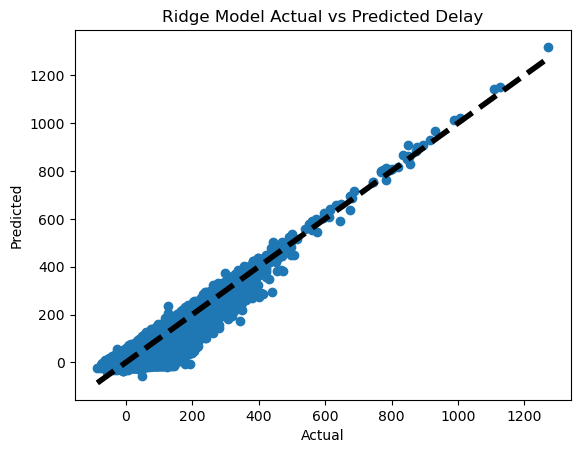

In [109]:
predicted = cross_val_predict(ridge_model, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Ridge Model Actual vs Predicted Delay')
plt.show()

In [110]:
compare_data = [[lasso_model_RMSE, lasso_model_mean_squared_score, lasso_model_R2, lasso_model_time], [ridge_model_RMSE, ridge_model_mean_squared_score, ridge_model_R2, ridge_model_time]]
compare_df = pd.DataFrame(compare_data, columns=['RMSE','Mean Square Score', 'R2', 'Train Time',], index=[
                               'Lasso',
                               'Ridge'])
compare_df

,RMSE,Mean Square Score,R2,Train Time
Lasso,18.004195,324.151031,0.835209,0.055651
Ridge,18.004004,324.144149,0.835212,0.020758


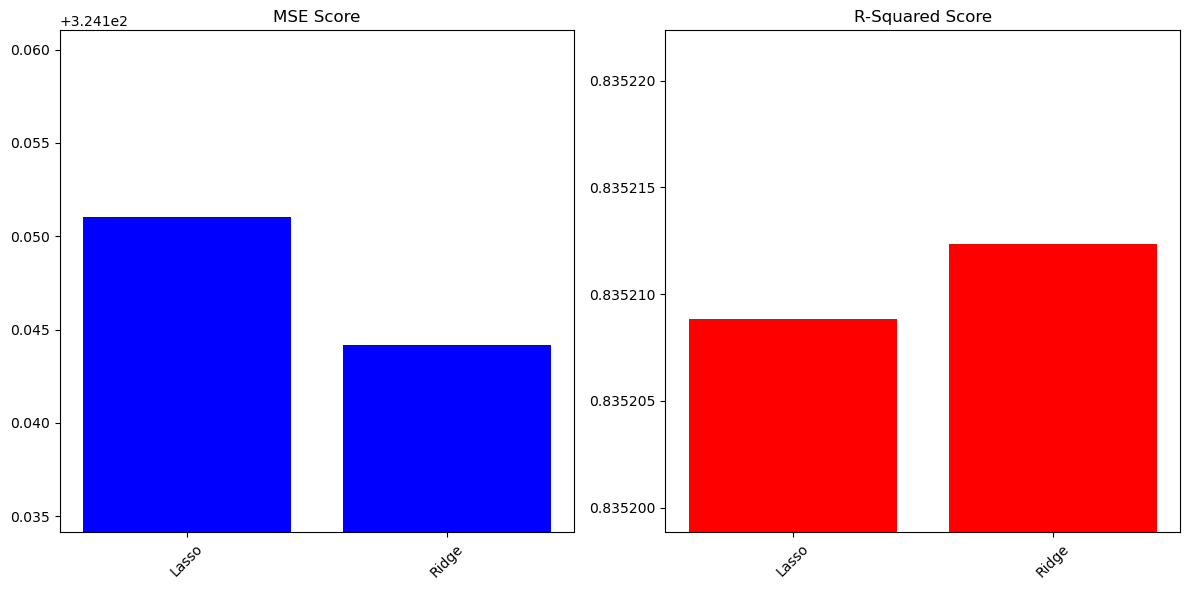

In [111]:
final_results = pd.DataFrame({"Model": ["Lasso", "Ridge"],
                              "MSE": [lasso_model_mean_squared_score, ridge_model_mean_squared_score],
                              "R-Squared": [lasso_model_R2, ridge_model_R2]})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(final_results["Model"], final_results["MSE"], color='blue')
plt.title("MSE Score")
plt.xticks(rotation=45)
mse_min, mse_max = final_results["MSE"].min(), final_results["MSE"].max()
#plt.ylim(mse_min - 0.0001, mse_max + 0.0001)
plt.ylim(mse_min - .01, mse_max + .01)

plt.subplot(1, 2, 2)
plt.bar(final_results["Model"], final_results["R-Squared"], color='red')
plt.title("R-Squared Score")
plt.xticks(rotation=45)
r2_min, r2_max = final_results["R-Squared"].min(), final_results["R-Squared"].max()
plt.ylim(r2_min - 0.00001, r2_max + 0.00001)

plt.tight_layout()
plt.show()

## The Ridge Regression model shows a slight improvement over the Lasso model.

# Modify Data

Using information collected from FAA.gov, I categorized the arrival delay target variable.

In [112]:
airlineData_cat = airlineData.copy()

In [113]:
airlineData_cat.loc[airlineData_cat['arr_delay'] <= 0, 'arr_delay_category'] = 0
airlineData_cat.loc[(airlineData_cat['arr_delay'] > 0) & (airlineData_cat['arr_delay'] <= 15), 'arr_delay_category'] = 1
airlineData_cat.loc[(airlineData_cat['arr_delay'] > 15) & (airlineData_cat['arr_delay'] <= 45), 'arr_delay_category'] = 2
airlineData_cat.loc[(airlineData_cat['arr_delay'] > 45), 'arr_delay_category'] = 3

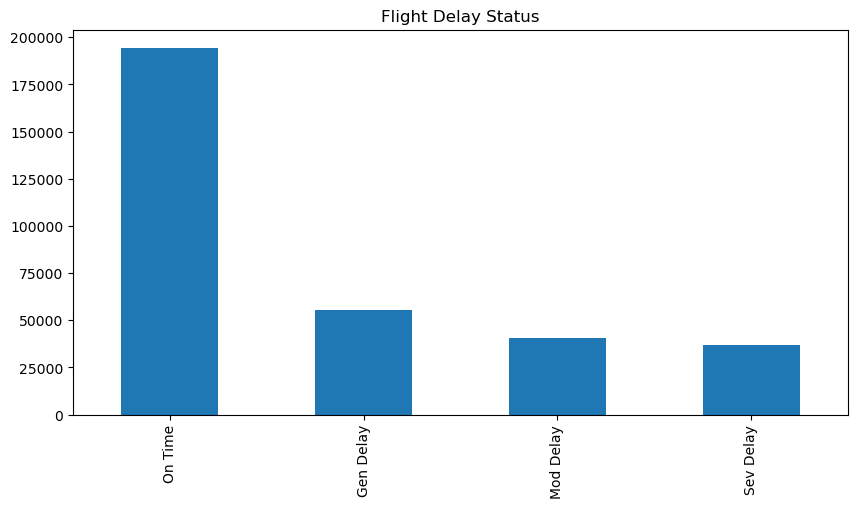

In [114]:
airlineData_cat_bar = airlineData_cat.copy()
airlineData_cat_bar['arr_delay_cat_bar'] = airlineData_cat['arr_delay_category'].map({0 : 'On Time',1 : 'Gen Delay',2 : 'Mod Delay',3 : 'Sev Delay'})

airlineData_cat_bar['arr_delay_cat_bar'].value_counts().plot(
    kind="bar", figsize=(10, 5), title="Flight Delay Status"
)
plt.show()

In [115]:
airlineData_cat['arr_delay_category'].value_counts()

0.0    194342
1.0     55374
2.0     40556
3.0     37074
Name: arr_delay_category, dtype: int64

In [116]:
airlineData_cat.drop(['arr_delay'],axis = 1,inplace = True)

In [117]:
X = airlineData_cat[['dep_delay', 'arr_time', 'dep_time', 'sched_arr_time', 'flight', 'sched_dep_time']]

# Target Column
y = airlineData_cat['arr_delay_category'].astype(int)

### Train/Test Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
print(type_of_target(y_train))

multiclass


# Dummy Classifier

Use Logistic Regression to build a basic model on your data.  

In [120]:
dummy_model = DummyClassifier(strategy='uniform')
dummy_model_start=time.time()
dummy_model.fit(X_train, y_train)
dummy_model_end=time.time()

dummy_model.predict(X_test)

dummy_model.score(X_test, y_test)

0.25156816422956296

### Logistic Regression Model

In [121]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model_start=time.time()
log_reg_model.fit(X_train, y_train)
log_reg_model_end=time.time()

log_reg_model_pred = log_reg_model.predict(X_test)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
# Test Accuracy Score
log_reg_model_test_acc = log_reg_model.score(X_test, y_test)
log_reg_model_test_acc

0.7108875402223942

In [123]:
#Train Accuracy Score
log_reg_model_train_acc = log_reg_model.score(X_train, y_train)
log_reg_model_train_acc

0.7105070218467151

In [124]:
#Train time
log_reg_model_time = log_reg_model_end - log_reg_model_start
log_reg_model_time

2.7497446537017822

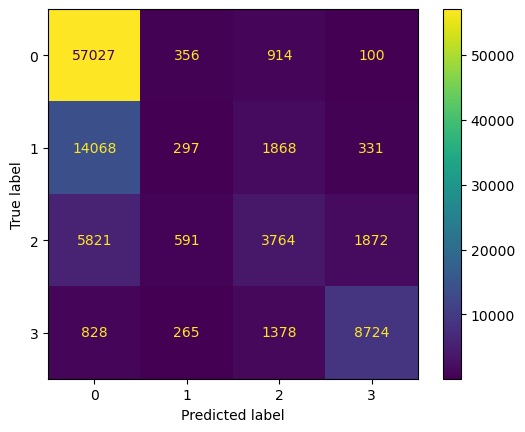

In [125]:
log_reg_cm = confusion_matrix(y_test, log_reg_model_pred, labels=log_reg_model.classes_)
ConfusionMatrixDisplay(log_reg_cm, display_labels=log_reg_model.classes_).plot()

In [126]:
log_reg_cm_a = np.array_split(log_reg_cm[0], 4)
log_reg_cm_b = np.array_split(log_reg_cm[1], 4)
log_reg_cm_c = np.array_split(log_reg_cm[2], 4)
log_reg_cm_d = np.array_split(log_reg_cm[3], 4)
log_reg_cm_pos_sum = log_reg_cm_a[0] + log_reg_cm_b[1] + log_reg_cm_c[2] + log_reg_cm_d[3]

In [127]:
#K Nearest Neighbor
knn_model = KNeighborsClassifier(n_jobs=1)

knn_model_start=time.time()
grid = {'n_neighbors':np.arange(1, 25)}
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model = GridSearchCV(knn_model, grid, cv=10)

knn_model.fit(X_train, y_train)
knn_model_end=time.time()

knn_model_pred = knn_model.predict(X_test)

In [128]:
# Test Accuracy Score
knn_model_test_acc = knn_model.score(X_test, y_test)
knn_model_test_acc
#7733

0.8757382591340475

In [129]:
#Train Accuracy Score
knn_model_train_acc = knn_model.score(X_train, y_train)
knn_model_train_acc

1.0

In [130]:
#Train time
knn_model_time = knn_model_end - knn_model_start
knn_model_time

174.45345520973206

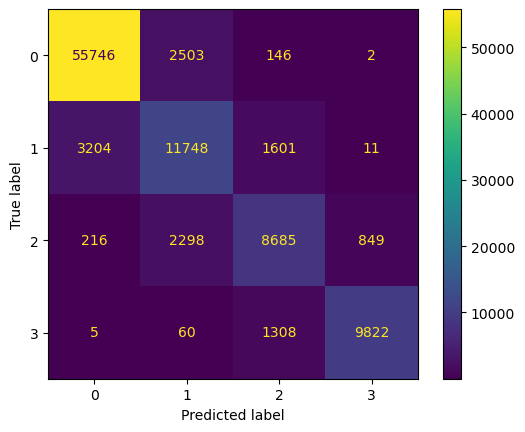

In [131]:
knn_cm = confusion_matrix(y_test, knn_model_pred, labels=knn_model.classes_)
ConfusionMatrixDisplay(knn_cm, display_labels=knn_model.classes_).plot()

In [132]:
knn_cm_a = np.array_split(knn_cm[0], 4)
knn_cm_b = np.array_split(knn_cm[1], 4)
knn_cm_c = np.array_split(knn_cm[2], 4)
knn_cm_d = np.array_split(knn_cm[3], 4)
knn_cm_pos_sum = knn_cm_a[0] + knn_cm_b[1] + knn_cm_c[2] + knn_cm_d[3]

In [133]:
#Decision Tree
dectree_model = DecisionTreeClassifier()

dectree_model_start=time.time()
parameters = {"min_samples_split": range(1, 25)}
dectree_model = GridSearchCV(dectree_model, param_grid=parameters, n_jobs=-1)

dectree_model.fit(X_train, y_train)
dectree_model_end=time.time()

dectree_model_pred = dectree_model.predict(X_test)

In [134]:
# Test Accuracy Score
dectree_model_test_acc = dectree_model.score(X_test, y_test)
dectree_model_test_acc
#.7281

0.9132520060282677

In [135]:
#Train Accuracy Score
dectree_model_train_acc = dectree_model.score(X_train, y_train)
dectree_model_train_acc

1.0

In [136]:
#Train time
dectree_model_time = dectree_model_end - dectree_model_start
dectree_model_time

24.58165407180786

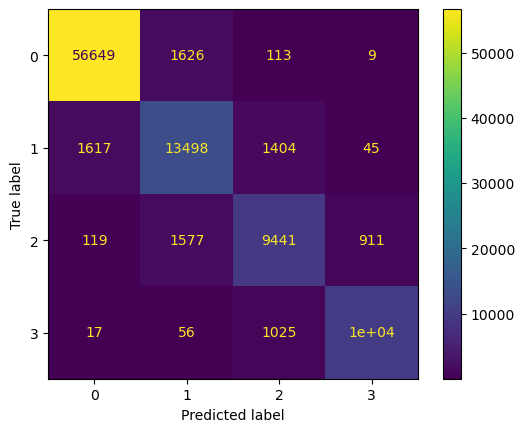

In [137]:
dectree_cm = confusion_matrix(y_test, dectree_model_pred, labels=dectree_model.classes_)
ConfusionMatrixDisplay(dectree_cm, display_labels=dectree_model.classes_).plot()

In [139]:
sum(sum(dectree_cm))

98204

In [141]:
dectree_cm_a = np.array_split(dectree_cm[0], 4)
dectree_cm_b = np.array_split(dectree_cm[1], 4)
dectree_cm_c = np.array_split(dectree_cm[2], 4)
dectree_cm_d = np.array_split(dectree_cm[3], 4)
dectree_cm_pos_sum = dectree_cm_a[0] + dectree_cm_b[1] + dectree_cm_c[2] + dectree_cm_d[3]

In [142]:
compare_confmatrix = [[str(log_reg_cm_pos_sum)[1:-1]], [str(knn_cm_pos_sum)[1:-1]], [str(dectree_cm_pos_sum)[1:-1]]]
compare_confmatrix_df = pd.DataFrame(compare_confmatrix, columns=['True Positives'], index=[
                               'LogReg', 'KNN', 'DecTree'])
compare_confmatrix_df

,True Positives
LogReg,69812
KNN,86001
DecTree,89685


In [143]:
compare_score_data = [[log_reg_model_test_acc, log_reg_model_time], [knn_model_test_acc, knn_model_time], [dectree_model_test_acc, dectree_model_time]]
compare_score_df = pd.DataFrame(compare_score_data, columns=['Score', 'Train Time',], index=[
                               'LogReg',
                               'KNN',
                               'DecTree'])
compare_score_df

,Score,Train Time
LogReg,0.710888,2.749745
KNN,0.875738,174.453455
DecTree,0.913252,24.581654
